**Проект:"Рекламная кампания интернет-магазина по продаже видео-игр "Стримчик" на 2017"**

**Описание исследования** 

**Место исследования:Интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры.**

**Суть исследования: Выявить закономерности, определяющие успешность игры.**

**Задачи исследования:Спланировать акценты рекламной кампании на 2017г.**

**Исходные данные. Данные взяты из открытых источников**

*Name — название игры*

*Platform — платформа*

*Year_of_Release — год выпуска*

*Genre — жанр игры*

*NA_sales — продажи в Северной Америке (миллионы проданных копий)*

*EU_sales — продажи в Европе (миллионы проданных копий)*

*JP_sales — продажи в Японии (миллионы проданных копий)*

*Other_sales — продажи в других странах (миллионы проданных копий)*

*Critic_Score — оценка критиков (максимум 100)*

*User_Score — оценка пользователей (максимум 10)*

*Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).*




### Подготовка данных

In [1]:
#Подключим библиотек для выполнения проекта
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats as st

In [2]:
# Откроем файл и изучим данные
data = pd.read_csv('/datasets/games.csv')
print(data.head())


                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [3]:
# Посмотрим описание.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Проведем подготовку данных к анализу. Для начала приведем имена всех столбцов  к ниженму регистру.
data.columns = data.columns.str.lower()


In [5]:
# Теперь проверим на количество пропущенных данных наши данные.
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
# Некие анонимные игры, по которым практически полностью данные отсутствуют. Их спокойно можно удалить.
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
# Удаление 
data = data.dropna(subset = ['name'])


***С пропусками в годе выпуска я также решил удалить, т.к количество данных в принципе незначительно(менее 1.6%).***

In [8]:
# Удаляем пропуски в год выпуска. 
data = data.dropna(subset = ['year_of_release'])

***Пропуски в оставшихся 3х столбцах оставим без изменения, т.к.***

***-слишком большой большой объем пропущенных данных во всех 3х столбцах***

***-отсутствие логичной замены в столбце рейтинг***

***-слишком большое влияние любой числовой замены в столбце оценок пользователей и критиков на анализ .***

***По поводу причин такого количества пропусков у меня 2 версии. Первая это то,что на очень старых играх не собирались оценнки от критиков и геймеров, а вторая наоборот,то что на свежих релизах еще проставлены оценки.
Пропуски в рейтингах игр связаны с тем,что ESRB была основана в 1994 году. ***

***Ниже я вывел среза 2, которые в какой-то мере иллюстрирует мои предположения.***

In [9]:
data.loc[data['year_of_release'] < 1994].head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN
50,Super Mario Land 2: 6 Golden Coins,GB,1992.0,Adventure,6.16,2.04,2.69,0.29,NaN,NaN,NaN
56,Super Mario All-Stars,SNES,1993.0,Platform,5.99,2.15,2.12,0.29,NaN,NaN,NaN
76,Super Mario Kart,SNES,1992.0,Racing,3.54,1.24,3.81,0.18,NaN,NaN,NaN
89,Pac-Man,2600,1982.0,Puzzle,7.28,0.45,0.00,0.08,NaN,NaN,NaN


In [10]:
data.loc[data['year_of_release'] == 2016].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5,E
108,Pokemon Sun/Moon,3DS,2016.0,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN
171,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T
245,Call of Duty: Infinite Warfare,PS4,2016.0,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M
289,Battlefield 1,PS4,2016.0,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M
325,Tom Clancy's The Division,PS4,2016.0,Shooter,1.35,1.70,0.15,0.60,80.0,7,M
571,FIFA 17,XOne,2016.0,Sports,0.43,2.05,0.00,0.17,84.0,5.5,E
640,Call of Duty: Infinite Warfare,XOne,2016.0,Shooter,1.46,0.74,0.00,0.22,78.0,3.1,M
708,Far Cry: Primal,PS4,2016.0,Action,0.60,1.25,0.06,0.35,76.0,6.3,M
709,Battlefield 1,XOne,2016.0,Shooter,1.28,0.77,0.00,0.20,87.0,8.2,M


*** Проверим данные на соответствие типу:***
 
 0   name               object        +
 
 1   platform           object        +
 
 2   year_of_release    float64       - (необходимо преобразовать целочисленное)
 
 3   genre              object        +
 
 4   na_sales           float64       +
 
 5   eu_sales           float64       +
 
 6   jp_sales           float64       +
 
 7   other_sales        float64       +
 
 8   critic_score       float64       +
 
 9   user_score         object        - (необходимо перевести в числовое)
 
 10  rating             object        +

In [11]:
# Преобразуем year_of_release
data['year_of_release']=data['year_of_release'].astype(int)

In [12]:
# Значения в столбце user_score. Необходимо выяснить почему тип данных object
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [13]:
# Среди значений затесалась аббревиатура "tbd".To Be Determined, то есть "Будет определено". Очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе "Дата выхода"
#Заменим на NaN и преобразуем во Float
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float')


Таким образом мы избавились от части пропусков и изменили тип данных в некоторых столбцах.

In [14]:
# Проверим на явные дубликаты
data.duplicated().sum()

0

In [15]:
#Явных дубликатов нет,посмотрим на неявные. Выберем пару "игра-консоль" и посмотрим дубликаты там.
data.loc[data.duplicated(subset=['name','platform'],keep= False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


*** Вылезли 3 пары, но обратите внимание на год выхода. В 2012 вышло переиздание игры NFS:most wanted на PC и Xbox 360. Поэтому это не дубли,а вполне самостоятельные игры.***

*** А вот игру "Madden NFL 13" на PS3 необходимо удалить.Год,платформа,названия идентичны. Причем необходимо сохранить игру с первым вхождением, т.к. в дубле отсутствуют данные о продажах ***


In [16]:
# Добавим в подмножества год релиза,чтобы не зацепить ремастеры и параметр,который сохранит первое вхождение.
data=data.drop_duplicates(subset=['name','platform','year_of_release'],keep='first')

***Т.о на весь датасет у нас оказался всего один дубликат,который мы удалили.***

In [17]:
#  суммы всех продаж
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']


### Исследовательский анализ данных

Text(0, 0.5, 'Количество вышедших игр')

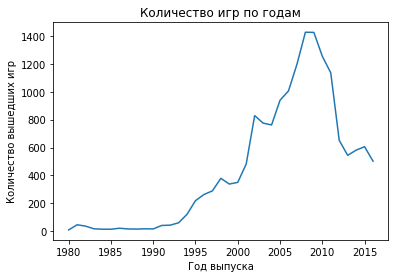

In [18]:
# Посмторим сколько игр выпускалось в разные годы.Проведем разбивку по годам и посторим график распределения.
data_year = data.groupby('year_of_release')['name'].count()
data_year.plot(title='Количество игр по годам')
plt.xlabel("Год выпуска")
plt.ylabel("Количество вышедших игр")

***Как мы видим, резкий рост производства видеоигр начался с 2000х в эпоху "шестого поколения" ,когда домашние консоли перешли на оптические носители(СD диски вмещали в деяятки раз больше информации),что позволило разарботчикам значительно улучшить качество игр и соответственно рост продаж. В это время выходят PS3 и Xbox360. А в 2005м выходит уже "седьмое поколение" PS4 и Xbox one, что продолжило экспоненциальный рост,вплоть до кризиса 2008 года. Потом происходит резкий спад,многие крупные игроки такие как EA , Activision пересматривают свою политику в сторону AAA-проектов, которые гарантировано принесут прибыль,но и количество игр соответственно падает.
Поскольку на приставки 6го покколения уже не выпускают новых игр, то смысла рассматривать их для стратегии на будущее нет.***

In [19]:
#Найдем платформы с наибольшими суммарными продажами и построим распределение по годам
top_ten = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
top_ten

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

Text(0, 0.5, 'Продажи в млн.шт')

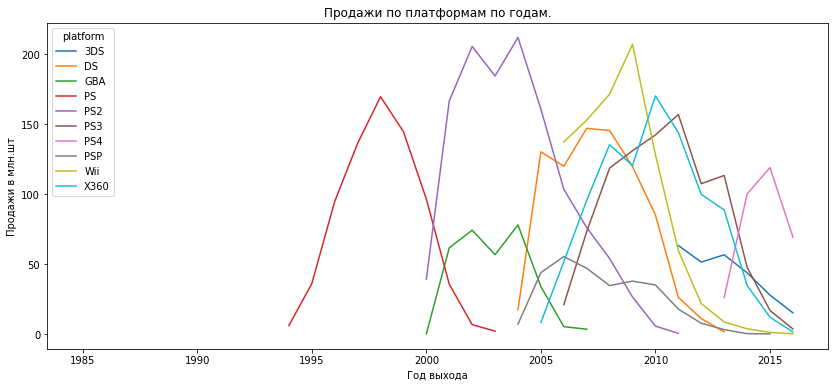

In [20]:
# Знаю,фильтрация "колхозная".Если подскажите как напрямую из top_ten индексы вытащить,то подскажите,пожалуйста.
# список самых продаваемых платформ.
top = ['PS2','X360','PS3','PS3','Wii','DS','PS','PS4','GBA','PSP','3DS']
# Фильтруем через список основной датасет.
top_data = data[data.platform.isin(top)]
# Через сводную строим график продаж по годам на каждую платформу.
top_data.pivot_table(index = 'year_of_release',columns='platform',values = 'total_sales',aggfunc='sum')\
.plot(figsize=(14,6))
plt.title("Продажи по платформам по годам.")
plt.xlabel("Год выхода")
plt.ylabel("Продажи в млн.шт")


***Как мы видим у всех графиков примерно одинаковый цикл существования - плюс-минус 10 лет. С каждым годом "тяжесть" игр растет, "железо" текущего поколения перестает быть актуальным,пока совсем сходит на нет.***

***Еще бы я отметил одну особенность, которая пригодится для дальнейшего анализа:все платформы из топ 10 имееют волнообразную
форму,т.е на старте количество игр растет,пока не выходит на пик(это примерно середина цикла,затем также падает к концу).***

***Таким образом для того,чтобы сделать прогноз на будущее, нужно "срезать" данные для актуальных консолей и платформ. Примем за отсечку 2014 год,чтобы зацепить все актуальные консоли.***


In [21]:
# Отсечем неактуальные данные, перезаписав датасет.
data = data.query('year_of_release >= 2014')


platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64


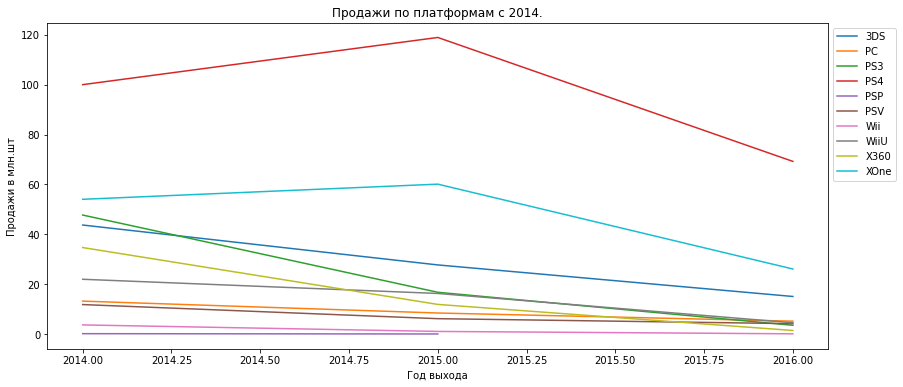

In [22]:
#Проанализируем платформы по продажам и их тенденции. Выберите несколько потенциально прибыльных платформ.
#Воспользуемся теми же графиками и методами,что и ранее,но уже на обновленном датасете.
print(data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10))
data.pivot_table(index = 'year_of_release',columns='platform',values = 'total_sales',aggfunc='sum')\
.plot(figsize=(14,6))
plt.title("Продажи по платформам с 2014.")
plt.xlabel("Год выхода")
plt.ylabel("Продажи в млн.шт")
plt.legend(bbox_to_anchor=(1,1))

***Как мы видим, у абсолютно всех платформ нисходящий тренд и спад,который характерен для заката любой консоли, независимо от компании производителя. Однако, у 3х из них до конца "цикла" еще 4-6 лет, а спад обусловнен кризисом 2008г.***

***Это PS4,XOne,WiiU. Именно эти консоли потенциально принесут наибольшую прибыль.***

***Еще на этом же графике выделяется график платформы PC, т.е персональных компьютеров. Его главное отличие это отсутствие ярко выраженного пика роста и последующего падения. Это вполне логично,т.к у компьютеров обновляемое железо и как такового жизненного цикла со сменой названия у него нет. Да,продажи у него не самые высокие ,зато стабильные. Поэтому отбрасывать эту ветку для развития продаж точно не стоит.***



In [23]:
# Сгруппируем данные по суммарным продажам в разрезе платформ. И посмотрим описательную статистику по квартилям.
data.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum').describe()

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,212.000000,151.000000,219.000000,376.000000,13.000000,295.000000,11.000000,73.000000,111.000000,228.000000
mean,0.408868,0.179139,0.311324,0.766356,0.027692,0.075932,0.460909,0.588767,0.434414,0.615614
std,1.188368,0.329359,0.633059,1.614969,0.027735,0.141591,0.625451,1.161467,0.628967,1.046513
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.030000,0.020000,0.040000,0.057500,0.010000,0.020000,0.035000,0.050000,0.070000,0.050000
50%,0.090000,0.060000,0.110000,0.185000,0.020000,0.040000,0.180000,0.190000,0.180000,0.205000
75%,0.250000,0.200000,0.325000,0.690000,0.020000,0.090000,0.755000,0.570000,0.505000,0.632500
max,11.680000,3.050000,5.270000,14.630000,0.090000,1.960000,2.010000,7.090000,4.280000,7.390000


*** Судя по описательной статистике все 'ящики' лежат в пределах 0.8 млн. Поставим это ограничение и построим графики ***

Text(0, 0.5, 'Продажи в млн.шт')

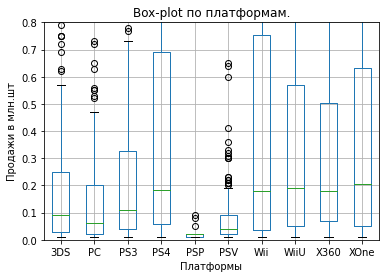

In [24]:
# Box-plot
data.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum').boxplot()
plt.ylim(0,0.8)
plt.title("Box-plot по платформам.")
plt.xlabel("Платформы")
plt.ylabel("Продажи в млн.шт")

***Как видно из boxplota в лидерах продаж игры на консолях Sony (PS4), Microsoft (Xbox360 и XboxONe) и Nintendo (Wii и WiiU).
Их медианы лежат почти в 2 раза выше остальных платформ,да и "ящики" намного шире.***

***Однако,стоит помнить, что это лидеры во всех 2х компаниях - это связки 6 и 7го поколения, а 6е поколение уже заканчивает свой цикл.Игры на Xbox360 до сих пор хорошо продаются,потому что Microsoft крайне пассивно ведет политику на новом поколении.На Xbox оне мало эксклюзивов, так называемых "system sellers" и игры продолжают выходить на 6е и 7е поколение.В отличие от Sony,которая сразу взяла с места в карьер. Ну, а продажи на Wii это фан-база японских геймеров.
Не стоит совсем выкидывать Xbox360,Wii из ассортимента,но лучше сосредоточится на громких релизах в их сегменте.***

***Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.***

***В качестве объекта исследования я выбрал PS3.***

Text(0, 0.5, 'Продажи в млн.шт')

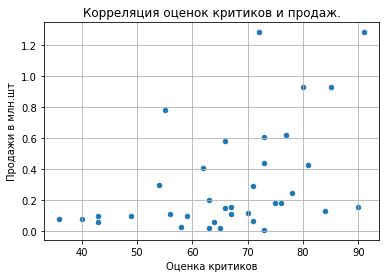

In [25]:
# Выделим данные по интересующей нас консоли
ps3 = data.query('platform == "PS3"')
# Построим диаграмму рассеяния между оценками критиков и общих продаж
ps3.plot(x='critic_score', y='total_sales', kind='scatter',grid=True)
plt.title("Корреляция оценок критиков и продаж.")
plt.xlabel("Оценка критиков")
plt.ylabel("Продажи в млн.шт")

***Как мы видим из этой диаграммы значительная часть самых продаваемых игр лежит в зоне рейтинга от 70 до 100,что соответсвует
высоко оцененным критиками играм.Здесь наблюдается зависимость чем выше рейтинг тем выше продажи.***

Text(0, 0.5, 'Продажи в млн.шт')

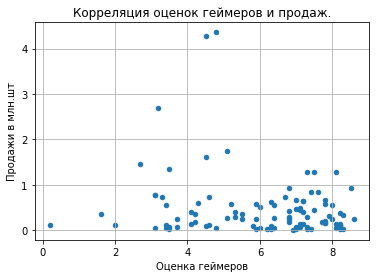

In [26]:
# Построим диаграмму рассеяния между оценками геймеров и общих продаж
ps3.plot(x='user_score', y='total_sales', kind='scatter',grid=True)
plt.title("Корреляция оценок геймеров и продаж.")
plt.xlabel("Оценка геймеров")
plt.ylabel("Продажи в млн.шт")

***А вот с оценками геймеров все не так однозначно,что в принципе логично - много людей + много мнений + возможность ставить десятичные оценки = гораздо более размытая диаграмма по сравнению с оценками критиков.***

***Проверим через коэффициент корреляции.***

In [27]:
# Выделим корреляциооные столбцы и посчитаем корреляцию
ps3 = ps3[['critic_score','user_score', 'total_sales']]
ps3.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.693445,0.446575
user_score,0.693445,1.000000,-0.166761
total_sales,0.446575,-0.166761,1.000000


***В целом выводы подтвердились - срденей силы прямая связь между оценками критиков(44%) и слабая обратная связи с оченками геймеров (-16,6%)***


In [28]:
# Проведем корреляцирнный анализ для потенциально прибыльных приставок 
top = ['X360','WiiU','PS4','XOne']
top_data = data[data.platform.isin(top)]
# Напишем цикл,который 
for platform in top:
    print(f'Платформа: {platform}, Коэффициент кореляции критиков:',top_data[top_data['platform']==platform]\
          .corr().loc['critic_score','total_sales'])
    print(f'Платформа: {platform}, Коэффициент кореляции геймеров:',top_data[top_data['platform']==platform]\
          .corr().loc['user_score','total_sales'])
    print('------------')
    


Платформа: X360, Коэффициент кореляции критиков: 0.5257228356581523
Платформа: X360, Коэффициент кореляции геймеров: -0.13844457094566498
------------
Платформа: WiiU, Коэффициент кореляции критиков: 0.3702014124808842
Платформа: WiiU, Коэффициент кореляции геймеров: 0.4079264579217078
------------
Платформа: PS4, Коэффициент кореляции критиков: 0.40266141068104144
Платформа: PS4, Коэффициент кореляции геймеров: -0.04013158947269716
------------
Платформа: XOne, Коэффициент кореляции критиков: 0.42867694370333287
Платформа: XOne, Коэффициент кореляции геймеров: -0.07038392806475892
------------


***Как мы видим,цифры несильно отличаются от PS3. или средняя прямая связь с оценками критиков и практически нулевая с оценками геймеров. И причины примерно такие же. ***

*** Однако,есть платформа ,которая выделяется. Это - "WiiU". На этой платформе связь оценок геймеров выше оценок критиков(ненамного,но по меркам остальных консолей целый прецидент) и связь одинаковой силы. Но это и не секрет- компания Nintendo славится своей фан-базой***



AxesSubplot(0.135,0.125;0.755x0.755)
AxesSubplot(0.135,0.125;0.755x0.755)


,total_sales,name,relation
genre,,,
Action,199.36,619,0.322068
Shooter,170.94,128,1.335469
Sports,109.48,161,0.680000
Role-Playing,101.44,221,0.459005
Misc,37.55,113,0.332301
Fighting,28.22,60,0.470333
Racing,27.52,69,0.398841
Platform,18.09,38,0.476053
Adventure,17.55,185,0.094865


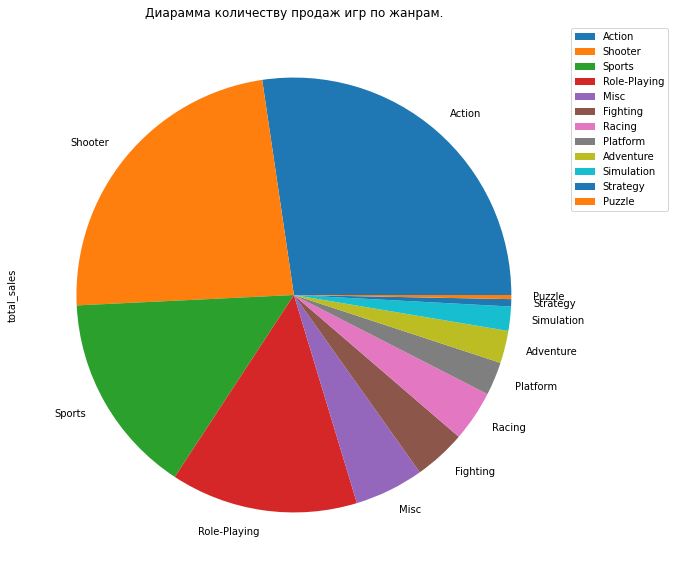

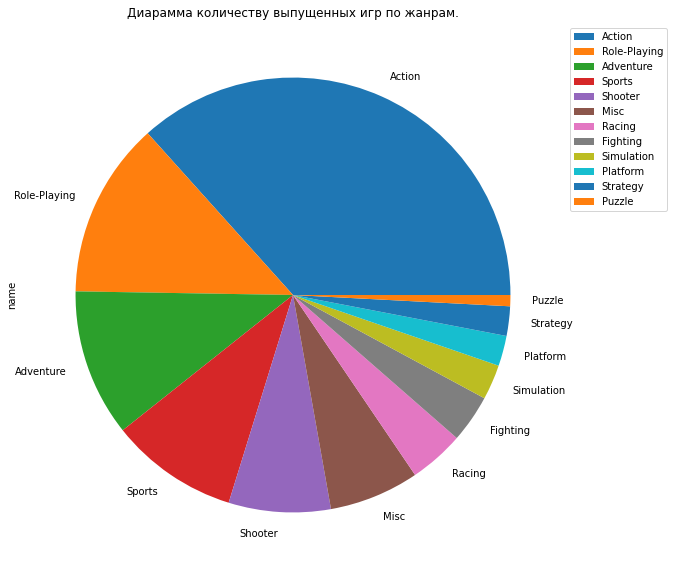

In [29]:
#Посмотрите на общее распределение игр по жанрам.

# Сводная продаж по жанрам
genre = data.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values\
(by='total_sales',ascending=False)
# круговая по продажам
print(genre.plot(y='total_sales',kind='pie',figsize=(10,10)))
plt.legend(bbox_to_anchor=(1,1))
plt.title("Диарамма количеству продаж игр по жанрам.")
# Сводная количество игр по жанрам
count_genre = data.pivot_table(index = 'genre', values = 'name', aggfunc = 'count').sort_values\
(by='name',ascending=False)
#  круговая по количеству игр
print(count_genre.plot(y='name',kind='pie',figsize=(10,10)))
plt.legend(bbox_to_anchor=(1,1))
plt.title("Диарамма количеству выпущенных игр по жанрам.")

# объеденим таблицы для оценки 
analis_genre = genre.merge(count_genre, on='genre')
analis_genre['relation'] = analis_genre['total_sales']/analis_genre['name']
analis_genre

***По круговым диаграммам видно насколько первая 5ка(Action,Sports,Shooter,Misc,Role-Playing) жанров перевешивает по продажам(да и по соотношению выпущенных игр) по отношению ко всем остальным.***

***Итак, по продажам у нас абсолютный лидер, это жанр "Action", однако, стоит заметить,что игр этого жанра выпускается запредельное количество. Почти в 2,5 раза больше ближайшего жанра. И коэф соотношения 0,32. Спросом пользуется не каждая игра. При наполнении ассортимента стоит это помнить.***

***Неплохое соотношении в этом плане в категории "Sport" . Тоже весомые продажи с соотношением 0.68 . Здесь с ассортиментом все просто - делайте ставку на "Fifa N", где N это текущий год, не прогадаете)***

***Ну, и абсолютный победитель  в этом плане "Shooter", 2й объем продаж и фантастические 1,33 млн на каждую выпущенную игру.***
 

***Совсем невысокие коэф продаж у Strategy и Adventure,хотя  Adventure в чистом виде как жанр практически не выходит и зачастую "склеен" с жанром "Action", да и вообще наблюдается тенденция к объединению жанров.А стратегии выходят только на ПК.  ***

### Портрет игрока.

Исследуем предпочтения пользователей в 3х регионах Европе,Америке и Японии.

Text(0, 0.5, 'Продажи в млн.шт')

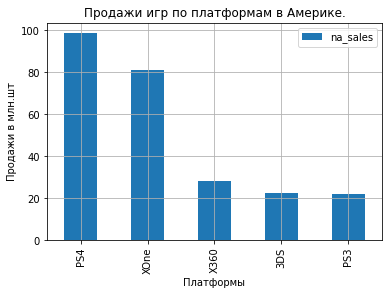

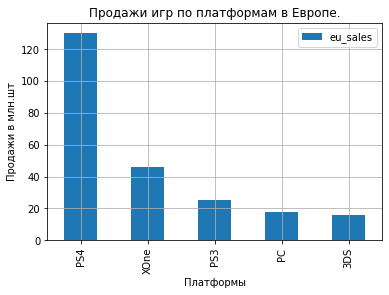

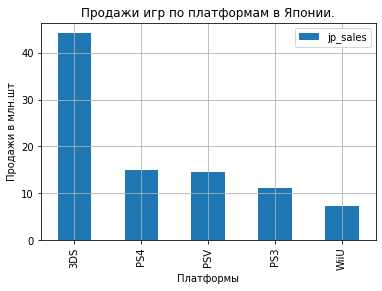

In [30]:
# Рассмотрим 5 самых популярных платформ во всех регионах через графики.
data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(by='na_sales', ascending=False)\
[:5].plot(kind ='bar',grid = True)
plt.title("Продажи игр по платформам в Америке.")
plt.xlabel("Платформы")
plt.ylabel("Продажи в млн.шт")

data.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by='eu_sales', ascending=False)\
[:5].plot(kind='bar',grid = True)
plt.title("Продажи игр по платформам в Европе.")
plt.xlabel("Платформы")
plt.ylabel("Продажи в млн.шт")

data.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by='jp_sales', ascending=False)\
[:5].plot(kind='bar',grid = True)
plt.title("Продажи игр по платформам в Японии.")
plt.xlabel("Платформы")
plt.ylabel("Продажи в млн.шт")

***Как мы видим,  американский и европейский рынок плотно оккупирован текущим поколением консолей.Лидер приставка от Сони, на втором от Майкрософт.В Америке продажи Xbox игр выше, поддерживают местного производителя).В вот в Японии все 5 мест за японскими производителями.***

Text(0, 0.5, 'Продажи в млн.шт')

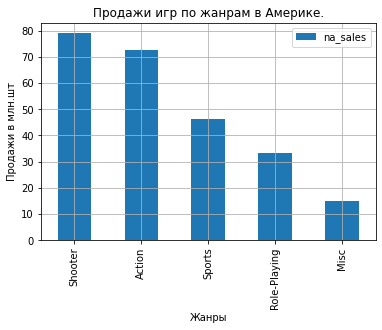

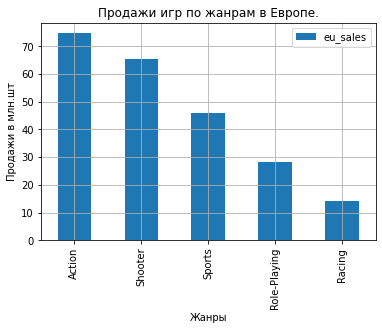

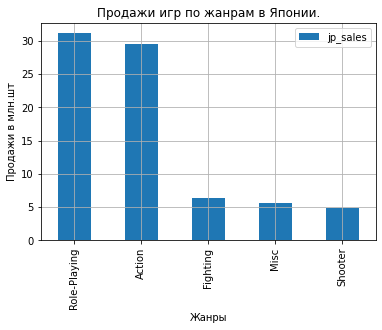

In [31]:
# Рассмотрим 5 самых популярных жанров во всех регионах через графики.
data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(by='na_sales', ascending=False)[:5]\
.plot(kind ='bar',grid = True)
plt.title("Продажи игр по жанрам в Америке.")
plt.xlabel("Жанры")
plt.ylabel("Продажи в млн.шт")

data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(by='eu_sales', ascending=False)[:5]\
.plot(kind ='bar',grid = True)
plt.title("Продажи игр по жанрам в Европе.")
plt.xlabel("Жанры")
plt.ylabel("Продажи в млн.шт")

data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by='jp_sales', ascending=False)[:5]\
.plot(kind ='bar',grid = True)
plt.title("Продажи игр по жанрам в Японии.")
plt.xlabel("Жанры")
plt.ylabel("Продажи в млн.шт")

***Япония-другая планета) Игры не исключения. пока весь остальной мир бегает,стреляет и играет в спортивные симуляторы, японцы предпочитают ролевые игры. Да и уровень продаж существенно отличается,все-таки народа в Японии существенно меньше,чем в США и Европе. ***

In [32]:
# Чтобы не потерять игры на которых вообще нет рейтинга поставим "заглушку" "no_rat"
data['rating']=data['rating'].fillna("no_ratio")

Text(0, 0.5, 'Продажи в млн.шт')

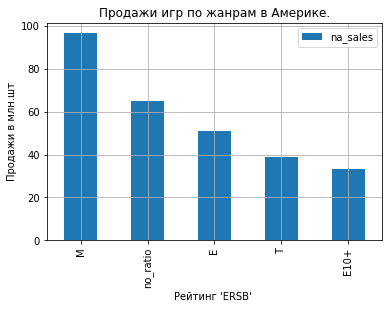

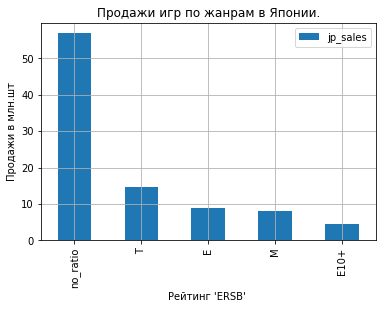

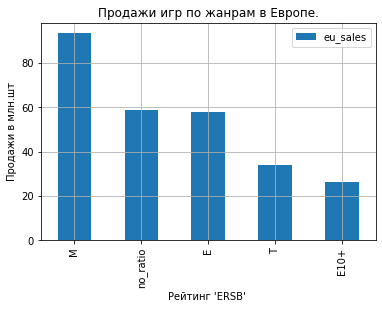

In [33]:
# Рассмотрим 5 самых оценок во всех регионах через графики.
data.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values(by='na_sales', ascending=False)\
[:5].plot(kind ='bar',grid = True)
plt.title("Продажи игр по жанрам в Америке.")
plt.xlabel("Рейтинг 'ERSB' ")
plt.ylabel("Продажи в млн.шт")

data.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values(by='jp_sales', ascending=False)\
[:5].plot(kind ='bar',grid = True)
plt.title("Продажи игр по жанрам в Японии.")
plt.xlabel("Рейтинг 'ERSB' ")
plt.ylabel("Продажи в млн.шт")

data.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values(by='eu_sales', ascending=False)\
[:5].plot(kind ='bar',grid = True)
plt.title("Продажи игр по жанрам в Европе.")
plt.xlabel("Рейтинг 'ERSB' ")
plt.ylabel("Продажи в млн.шт")

 ***Для Европы и Америки в целом картины схожи. На первом месте рейтинг M(Mature)-только для взрослых, здесь мы вспоминаем какой жанр у нас крайне популярен и понимаем,что было бы странно,если шутеры(да и многие экшн игры) имели другой рейтинг. ***
 
***А вот в Японии интересная картина. Там в лидерах игры без оценок.Но мы-то помним,что Япония это другая планета). Скорее всего тут в лидерах игры,которые выпущены на территории самой Японии и оценку в ERSB не проходили ***


### Проверка гипотез.

***Поскольку у насс достаточно большая выборка(>50),тогда среднее число выборок будет нормально распределено и для проверки наших гипотез мы воспользуемся двусторонним T-тест (или тест Стьюдента),который решает задачу доказательства наличия различий средних значений количественной переменной в случае, когда имеются лишь две сравниваемые группы и независимые группы.***

***Для результатов с 99-процентным уровнем достоверности значение выставим alpha = 0,01***


***Сформулируем гипотезы и начнем проверку.***

***Гипотеза №1:Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Сформулируем сначала нулевую и альтернативную гипотезу.А затем проверим их.***

***Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.***

***Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.***

In [34]:
#Зададим пороговое значение 
alpha = 0.01
#Выведем необходимые нам данные для проверки гипотезы.Сразу необходимо удалить пустые значения, иначе критерий будет равен Nan.
pc_rating = data.loc[data['platform']== 'PC']['user_score'].dropna().values
one_rating = data.loc[data['platform']== 'XOne']['user_score'].dropna().values
# Рассчитаем T-критерий.Выставим опции equal_var = False он выполняет t-тест Welchs, который не предполагает равную дисперсию совокупности.
results = st.ttest_ind(pc_rating, one_rating, equal_var=False)
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


***Итак, мы не можем отвергнуть нулевую гипотезу, а значит рейтинги на этих 2х платформах равны.***

***В целом , это закономерный результат исходя из того,что XBox это приставка корпорации "Microsoft" и все игры,выходящие на данную консоль портируются на PC, на которой стоит ОС "Windows", а это 75% ПК. ***

***Теперь проверим гипотезу,что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Сформулируем гипотезы.
Н0 (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые.***

***Н1 (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.***

In [35]:
#Зададим пороговое значение 
alpha = 0.01
#Выведем необходимые нам данные для проверки гипотезы.
action_rating = data.loc[data['genre']== 'Action']['user_score'].dropna().values
sport_rating = data.loc[data['genre']== 'Sports']['user_score'].dropna().values
results = st.ttest_ind(action_rating, sport_rating, equal_var=False)
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

1.1825550382644557e-14
Отвергаем нулевую гипотезу


***В этом случае мы отвергаем нулевую и принимаем альтернативную - рейтинги отличаются между собой. Здесь все просто. Разные жанры - разные методы оценки у игроков, разные рейтинги. Мы лишь подтвердили это с помощью статистики.***

### Выводы



***В ходе нашего исследования были проанализированы данные по продаже игр на разных платформах за период с 1984 - 2016. И целью было спланировать рекламную компанию на 2017г. Ниже подведены итоги исследования***

***В ходе исследовательского анализа мы проанализировали:***

- Был выявлен примерный жизненный цикл консолей.Выявленный цикл позволил отрезать неактульные данные и уже на вновь сформированном датасете проанализировать игры на каких платформах будут продаваться. Большинство консолей из списка либо завершили, либо завершают цикл.Актуальными на сегодняшний день остаются из 6го поколения : Xbox360 и WII(рекомендации по ассортименту 6го поколения в соответствующем блоке) .И все приставки 7го поколения: PS4,XBoxOne,WiiU. Особый акцент рекомендую сделать на играх PS4, т.к она на лидирующих позициях в 2х из 3 регионов.И лишь в Японии продажи уступают, там Сони на 2месте.

- Была проанализирована корреляционная зависимость продаж игр от оценок геймеров и критиков. Корреляционная зависимость была выявлена лишь от оценок критиков, да и связь эта средней силы , максимальный коэффициент составляет 40%. Оценки критиков важны,но не определяющий фактор.

- Был произведен анализ продаж игр в зависимости от жанра. Здесь сразу стоит оговориться,что очень сильно влияет регион продаж. В Еропе и Америке это жанр Action,Shooter,Sports, а в Японии это Role-play и Action. Наиболее безопасным жанром являются шутеры, на каждую выпущенную игру приходится более миллиона продаж. В то время как Action игры около 320 000, т.е стоит помнить что размах в продажах тех или иных экш-игр может быть очень большой.В этом жанре я бы рекомендовал сделать ставку на AAA проекты от крупных игроков (EA,Sony,SquareEnix и т.д).
- Касаемо рейтингов,то ориентируемся на сектор с буквой "M", т.е только для взрослых.
- Еще один важный  момент по региональной политике заключается в том,что Япония самый нишевый рынок из всех. Там предпочитают и другие игры нежели в Европе и Америке и предпочитают своих производителей и по приставкам и по играм.

*** Если обощить все вышенаписанное, до однострочных выводов то,***

***-Если приставка,то PS4. Независимо от региона.***

***Если жанр, то Shooters и Action (AAA-проекты от крупных игроков) с рейтингом "М" для Европы и Америки.*** 

***Role-play(японских разработчиков) и Action (AAA-проекты от крупных игроков) для Японии.***

